In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../")

In [5]:
from src.utils.polytope_wrap import gate_set_to_coverage
from src.utils.custom_gates import RiSwapGate, CustomCostGate
basis_gates = [CustomCostGate.from_gate(RiSwapGate(1/2), cost=1/2), CustomCostGate.from_gate(RiSwapGate(1/3), cost=1/3)]
gate_set_to_coverage(*basis_gates)

INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | $\sqrt[3]{iSwap}$
0.00000	 | $\sqrt[2]{iSwap}$
0.06819	 | $\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$
0.21489	 | $\sqrt[3]{iSwap}$.$\sqrt[2]{iSwap}$
0.67681	 | $\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$
0.03847	 | $\sqrt[3]{iSwap}$.$\sqrt[2]{iSwap}$.$\sqrt[3]{iSwap}$
0.00165	 | $\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$
0.00000	 | $\sqrt[3]{iSwap}$.$\sqrt[2]{iSwap}$.$\sqrt[3]{iSwap}$.$\sqrt[3]{iSwap}$


INFO:root:Haar-expectation cost: 0.9484185085810616


0.9484185085810616

INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.263533584618538
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 4.441917398633472
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.0923351827359733
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.503872946744405
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.10702995951045
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.10702995951045
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.503872946744405
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.054108241323724
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 4.411835552289101
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.240322765512005
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.0001374571237025
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.04011736

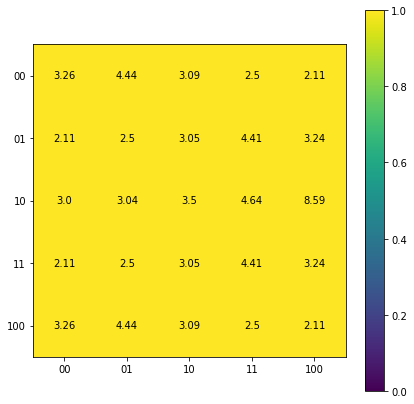

In [3]:
#test expected cost of fsim
from src.utils.custom_gates import SYC, FSim
# u= CustomCostGate.from_gate(SYC(), cost=1)
# gate_set_to_coverage(u)
#sweep parameters of fSim gate with t=1 to see how expected haar changes
from src.utils.custom_gates import CustomCostGate
from src.utils.polytope_wrap import gate_set_to_coverage
import numpy as np

data = []
for i in range(1,6):
    temp_data = []
    for j in range(1,6):
        u = FSim(theta=i*np.pi/6, phi=j*np.pi/6).to_matrix()
        #u = CustomCostGate(u, f"fSim({i*np.pi/6, j*np.pi/6})", cost=1)
        #what is duration; proportional to rotation?
        cost = max(i*np.pi/6, j*np.pi/6)
        u = CustomCostGate(u, f"fSim({i*np.pi/6, j*np.pi/6})", cost=1)
        result = gate_set_to_coverage(u, chatty=False)
        temp_data.append(result)
    data.append(temp_data) 

from src.utils.visualize import plotMatrix
plotMatrix(np.matrix(data))

In [ ]:
#notice that the 8.59 is the worst, but also is very close to SWAP

In [12]:
# i,j = (3,5)
# u = FSim(theta=i*np.pi/6, phi=j*np.pi/6).to_matrix()
# plotMatrix(u)
# # u = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=1)
# # gate_set_to_coverage(u, chatty=True)
# from src.utils.visualize import unitary_to_weyl
# unitary_to_weyl(u)

In [51]:
#test expected CAN(symmetric middle)
from src.utils.custom_gates import CanonicalGate
u = CanonicalGate(np.pi/4, np.pi/8 ,np.pi/16).to_matrix()
u = CustomCostGate(u, "can")
gate_set_to_coverage(u)
# from src.utils.visualize import unitary_to_weyl
# unitary_to_weyl(u)

INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | can
0.99882	 | can.can
0.00118	 | can.can.can


INFO:root:Haar-expectation cost: 2.0011770545216936


2.0011770545216936

Question for Chao: how do parameters relate to duration? If t=1, then we talk about duration using the parameter 3pi/8, but what if we are changing t?

In [58]:
#test to see expected costs of fractional B gates
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import ConversionGainHamiltonian
import numpy as np
h = ConversionGainHamiltonian()
for d in range(1,5):
    u = h._construct_U_lambda(3*np.pi/8, np.pi/8)(1/d).full()
    u = CustomCostGate(u, f"B^(1/{d})", cost=1/d)
    gate_set_to_coverage(u)

INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B^(1/1)
1.00000	 | B^(1/1).B^(1/1)


INFO:root:Haar-expectation cost: 2.0
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B^(1/2)
0.50000	 | B^(1/2).B^(1/2)
0.49581	 | B^(1/2).B^(1/2).B^(1/2)
0.00419	 | B^(1/2).B^(1/2).B^(1/2).B^(1/2)


INFO:root:Haar-expectation cost: 1.2520947828594555
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B^(1/3)
0.03142	 | B^(1/3).B^(1/3)
0.46858	 | B^(1/3).B^(1/3).B^(1/3)
0.45988	 | B^(1/3).B^(1/3).B^(1/3).B^(1/3)
0.03998	 | B^(1/3).B^(1/3).B^(1/3).B^(1/3).B^(1/3)
0.00014	 | B^(1/3).B^(1/3).B^(1/3).B^(1/3).B^(1/3).B^(1/3)


INFO:root:Haar-expectation cost: 1.1696105275291186
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B^(1/4)
0.00316	 | B^(1/4).B^(1/4)
0.07246	 | B^(1/4).B^(1/4).B^(1/4)
0.42437	 | B^(1/4).B^(1/4).B^(1/4).B^(1/4)
0.40561	 | B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4)
0.09020	 | B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4)
0.00418	 | B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4)
0.00001	 | B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4).B^(1/4)


INFO:root:Haar-expectation cost: 1.1299491073593464


INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.540254820808025
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.041729136984175
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.0
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.0454225284540524
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.0
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.041729136984175
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.540254820808027
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.8395746639269435
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.041729136984175
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.000000000000001
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.041729136984175
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.209882636315677
INFO:root:==== Haa

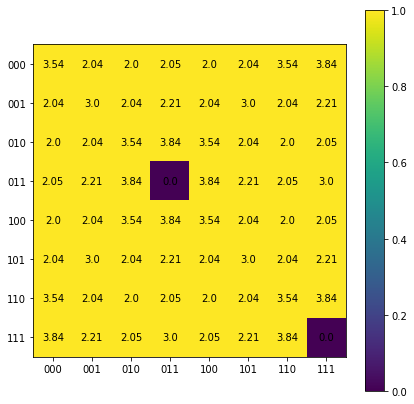

In [10]:
#sweep parameters of B gate with t=1 to see how expected haar changes
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import ConversionGainHamiltonian
from src.utils.polytope_wrap import gate_set_to_coverage
import numpy as np
h = ConversionGainHamiltonian()
data = []
for i in range(1,9):
    temp_data = []
    for j in range(1,9):
        u = h._construct_U_lambda(i*np.pi/8, j*np.pi/8)(1).full()
        u = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=1)
        result = gate_set_to_coverage(u, chatty=False)
        temp_data.append(result)
    data.append(temp_data) 

from src.utils.visualize import plotMatrix
plotMatrix(np.matrix(data))

In [ ]:
#TODO plot spanning region of the 2.04 gate

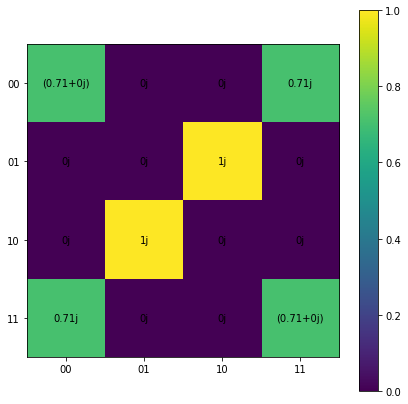

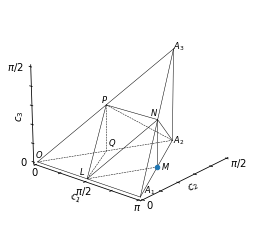

In [9]:
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import ConversionGainHamiltonian
from src.utils.polytope_wrap import gate_set_to_coverage
import numpy as np
from src.utils.visualize import plotMatrix
h = ConversionGainHamiltonian()
i,j = (4,2)
u = h._construct_U_lambda(i*np.pi/8, j*np.pi/8)(1).full()
plotMatrix(u)
# u = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=1)
# gate_set_to_coverage(u, chatty=True)
from src.utils.visualize import unitary_to_weyl
unitary_to_weyl(u)

In [45]:
#this doesn't really work but just seeing what would happen if try to minimize expected cost

# from src.hamiltonian import ConversionGainHamiltonian
# h = ConversionGainHamiltonian()
# import numpy as np
# gv = [3*np.pi/8, np.pi/8]
# import scipy.optimize as opt
# def opt_fun(gv):
#     return gate_set_to_coverage(h.construct_U(*gv).full())
# result = opt.minimize(fun=opt_fun, x0=gv)